<p  style="text-align: center;"><font size="12"><b>PIMA INDIANS & DIABETES</b></font></p>
<p  style="text-align: center;"><font size="4"><b>AN EXPLORATORY DATA ANALYSIS</b></font></p>

### ABOUT THE DATASET
The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their **BMI**, **insulin level**, **age**, and so on.

### CONTEXT
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to  predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. All patients here are females at least 21 years old of Pima Indian heritage.



<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='#1'>I. LOAD LIBRARIES & PACKAGES</a>

* <a href='#2'>II. DATA OVERVIEW & INSIGHTS</a>

* <a href='#3'>III. MISSING DATA & UNIVARIATE ANALYSIS</a>
    
* <a href='#4'>IV. EXPLORATORY DATA ANALYSIS</a>
    * <a href='#4a'>IVa. Define Plot Functions</a> 
    * <a href='#4b'>IVb. Bivariate Exploration</a> 

# <a id='1'>I. LOAD PACKAGES & LIBRARIES</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install seaborn==0.11.0

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 283 kB 413 kB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# <a id='2'>II. DATA OVERVIEW & INITIAL INSIGHTS</a>

In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

In [5]:
df.reset_index(inplace=True)
df.rename(columns={'index':'id'}, inplace=True)
df.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
for col in df.columns:
    df.rename(columns={col:col.lower()}, inplace=True)

df.rename(columns={'bloodpressure':'blood_pressure','skinthickness':'skin_thickness',
                  'diabetespedigreefunction':'diabetes_pedigree_function'}, inplace=True)

In [7]:
df.describe()

,id,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_healthy = df.loc[df['outcome'] == 0]
df_diabetic = df.loc[df['outcome'] == 1]

# <a id='3'>III. MISSING VALUES & UNIVARIATE EXPLORATION</a>

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
outcome,0,0.0
age,0,0.0
diabetes_pedigree_function,0,0.0
bmi,0,0.0
insulin,0,0.0
skin_thickness,0,0.0
blood_pressure,0,0.0
glucose,0,0.0
pregnancies,0,0.0
id,0,0.0


According to this dataframe there are no missing values, however some features contain a 0 value which doesn't make sense for features such as BMI. So let's replace 0 with NaN for features that should not contain 0 values. 

In [10]:
# REPLACE 0 VALUES WITH 'NAN'
df[['glucose','blood_pressure','skin_thickness','insulin','bmi']] = df[['glucose','blood_pressure','skin_thickness','insulin','bmi']].replace(0,np.NaN)

In [11]:
# totals = df.isnull().sum().sort_values(ascending=False)
totals = pd.DataFrame((len(df['id']) - df.isnull().sum()), columns = ['count'])
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total','percent'], sort=False).sort_values('total', ascending=False)
totals

,count
id,768
pregnancies,768
glucose,763
blood_pressure,733
skin_thickness,541
insulin,394
bmi,757
diabetes_pedigree_function,768
age,768
outcome,768


In [12]:
# VISUALIZE MISSING DATA PERCENTAGES

def missing_plot(dataset, feature):
    totals = pd.DataFrame((len(df['id']) - df.isnull().sum()), columns = ['count'])
    missing_percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
    df_missing = pd.concat([total, missing_percent], axis=1, keys=['total','percent'], sort=False).sort_values('total', ascending=False)
    df_missing = df_missing.round(2)
    
    trace = go.Bar(x = totals.index, 
                   y = totals['count'],
                   opacity = 0.8, 
                   text = df_missing['percent'],  
                   textposition = 'auto',
                   marker=dict(color = '#41d9b3', line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Value Count & Percentage")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [13]:
missing_plot(df, 'id')

### GET MEAN VALUES FOR EACH FEAUTRE WITH NAN VALUES

In [14]:
def get_mean(feat):
    temp = df[df[feat].notnull()]
    temp = temp[[feat,'outcome']].groupby(['outcome'])[[feat]].mean().reset_index()
    temp = temp.round(2)
    return temp


In [15]:
def plot_dist(feature, binsize):
    # 2 datasets
    df_healthy = df.loc[df['outcome'] == 0]
    healthy = df[feature]
    
    df_diabetic = df.loc[df['outcome'] == 1]
    diabetic = df_diabetic[feature]
    
    hist_data = [healthy, diabetic]
    
    group_labels = ['healthy', 'diabetic']
    colors = ['#41d9b3', '#c73062']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = binsize, curve_type='kde')
    
    fig['layout'].update(title = feature.upper())

    py.iplot(fig, filename = 'Density plot')

### INSULIN

In [16]:
get_mean('insulin')

,outcome,insulin
0,0,130.29
1,1,206.85


In [17]:
# REPLACE NAN VALUES WITH MEAN 

df.loc[(df['outcome'] == 0) & (df['insulin'].isnull()), 'insulin'] = 130.29
df.loc[(df['outcome'] == 1) & (df['insulin'].isnull()), 'insulin'] = 206.85

In [18]:
plot_dist('insulin', 0)

### GLUCOSE

In [19]:
get_mean('glucose')

,outcome,glucose
0,0,110.64
1,1,142.32


In [20]:
df.loc[(df['outcome'] == 0) & (df['glucose'].isnull()), 'glucose'] = 110.64
df.loc[(df['outcome'] == 1) & (df['glucose'].isnull()), 'glucose'] = 142.32

In [21]:
plot_dist('glucose',0)

### BLOOD PRESSURE

In [22]:
get_mean('blood_pressure')

,outcome,blood_pressure
0,0,70.88
1,1,75.32


In [23]:
# REPLACE NAN VALUES WITH MEAN 

df.loc[(df['outcome'] == 0) & (df['blood_pressure'].isnull()), 'blood_pressure'] = 70.88
df.loc[(df['outcome'] == 1) & (df['blood_pressure'].isnull()), 'blood_pressure'] = 75.32

In [24]:
plot_dist('blood_pressure', 0)

### SKIN THICKNESS

In [25]:
get_mean('skin_thickness')

,outcome,skin_thickness
0,0,27.24
1,1,33.00


In [26]:
df.loc[(df['outcome'] == 0) & (df['skin_thickness'].isnull()), 'skin_thickness'] = 27.24
df.loc[(df['outcome'] == 1) & (df['skin_thickness'].isnull()), 'skin_thickness'] = 33.00

In [27]:
plot_dist('skin_thickness',0)

### BMI

In [28]:
get_mean('bmi')

,outcome,bmi
0,0,30.86
1,1,35.41


In [29]:
df.loc[(df['outcome'] == 0) & (df['bmi'].isnull()), 'bmi'] = 30.86
df.loc[(df['outcome'] == 1) & (df['bmi'].isnull()), 'bmi'] = 35.41

In [30]:
plot_dist('bmi',0)

### DIABETES PEDIGREE FUNCTION

In [31]:
get_mean('diabetes_pedigree_function')

,outcome,diabetes_pedigree_function
0,0,0.43
1,1,0.55


In [32]:
df.loc[(df['outcome'] == 0) & (df['diabetes_pedigree_function'].isnull()), 'diabetes_pedigree_function'] = 0.43
df.loc[(df['outcome'] == 1) & (df['diabetes_pedigree_function'].isnull()), 'diabetes_pedigree_function'] = 0.55

In [33]:
plot_dist('diabetes_pedigree_function',0)

In [34]:
missing_plot(df, 'id')

In [35]:
plot_dist('age',0)

Text(0.5, 1.0, 'Diabetes - Pregnancy Outcome Count')

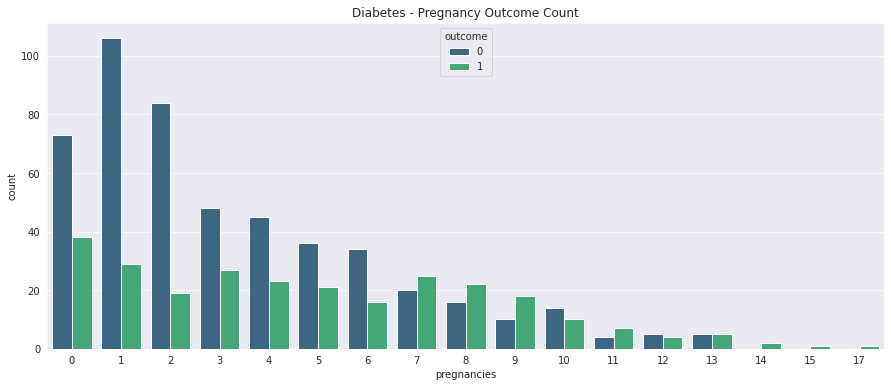

In [36]:
outcome_preg = df.groupby(['outcome','pregnancies'])[['id']].count()
outcome_preg.reset_index(inplace=True)
outcome_preg.rename(columns={'id':'count'}, inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.barplot(x='pregnancies', y='count', hue='outcome', data=outcome_preg, palette='viridis')
plt.title('Diabetes - Pregnancy Outcome Count')


## CORRELATION

Text(0.5, 1.0, 'FEATURE VARIABLE CORRELATIONS')

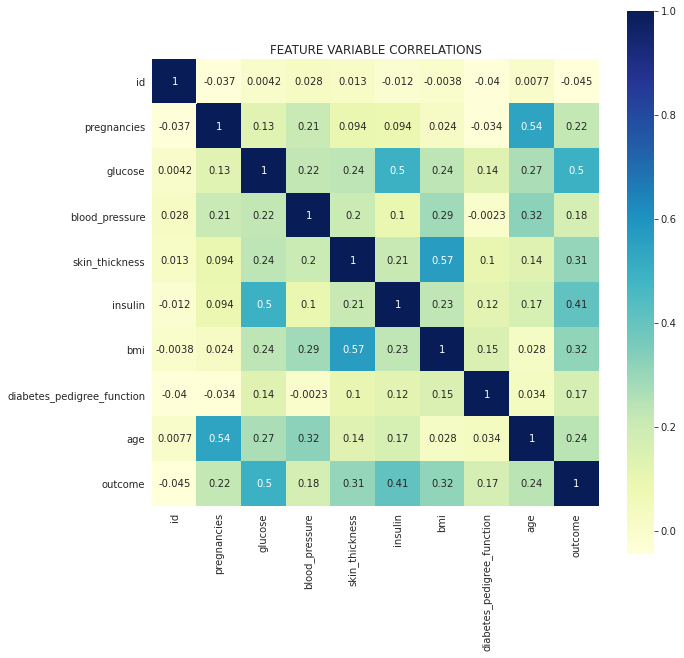

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, cmap= 'YlGnBu')
plt.title('FEATURE VARIABLE CORRELATIONS')


# <a id='4'>IV. EXPLORATORY DATA ANALYSIS</a> 

## <a id='4a'>IVa. DEFINE PLOTTING FUNCTIONS</a>


In [38]:
def plot_features(feat1, feat2):  
    diabetic = df[(df['outcome'] == 1)]
    healthy = df[(df['outcome'] == 0)]
    
    trace0 = go.Scatter(x = diabetic[feat1], 
                        y = diabetic[feat2],
                        name = 'diabetic',
                        mode = 'markers', 
                        marker = dict(color = '#c73062', line = dict(width = 1)))

    trace1 = go.Scatter(x = healthy[feat1], 
                        y = healthy[feat2],
                        name = 'healthy',
                        mode = 'markers',
                        marker = dict(color = '#41d9b3', line = dict(width = 1)))

    layout = dict(title = feat1.upper() + " " + "vs" +" " + feat2.upper(),
                  height = 750, width = 1000,
                  yaxis = dict(title = feat2.upper(), zeroline = False),
                  xaxis = dict(title = feat1.upper(), zeroline = False))

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [39]:
def barplot(feature, sub) :
    diabetic = df[(df['outcome'] == 1)]
    healthy = df[(df['outcome'] == 0)]
#     tmp3 = pd.DataFrame(pd.crosstab(df[feature],df['outcome']), )
    
#     tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['#c73062','#41d9b3']
    trace1 = go.Bar(x=diabetic[feature].value_counts().keys().tolist(),
                    y=diabetic[feature].value_counts().values.tolist(),
                    text=diabetic[feature].value_counts().values.tolist(),
                    textposition = 'auto',
                    name='diabetic',
                    opacity = 0.8, 
                    marker=dict(color='#c73062', line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(x=healthy[feature].value_counts().keys().tolist(),
                    y=healthy[feature].value_counts().values.tolist(),
                    text=healthy[feature].value_counts().values.tolist(),
                    textposition = 'auto',
                    name='healthy', 
                    opacity = 0.8, 
                    marker=dict(color='#41d9b3', line=dict(color='#000000',width=1)))
    
#     trace3 =  go.Scatter(x=tmp3.index,
#                          y=tmp3['% diabetic'],
#                          yaxis = 'y2', 
#                          name='% diabetic', 
#                          opacity = 0.6, 
#                          marker=dict(color='black', line=dict(color='#000000',width=0.5)))

    layout = dict(title = str(feature)+' '+(sub),
                  xaxis=dict(), 
                  yaxis=dict(title='Count'), 
                  yaxis2=dict(range= [-0, 75], 
                              overlaying= 'y', 
                              anchor= 'x', 
                              side= 'right',
                              zeroline=False,
                              showgrid= False, 
                              title= '% diabetic'))

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

In [40]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)

def pieplot(feature, sub):
    diabetic = df[(df['outcome'] == 1)]
    healthy = df[(df['outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = diabetic[feature].value_counts().values.tolist(),
                    labels  = diabetic[feature].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    
    trace2 = go.Pie(values  = healthy[feature].value_counts().values.tolist(),
                    labels  = healthy[feature].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = feature.upper() + " distribution by target: "+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

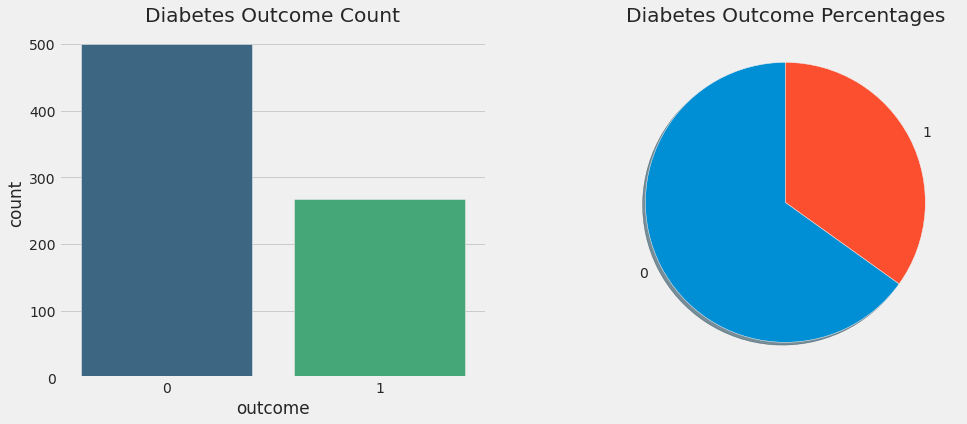

In [41]:
#CREATE A DATAFRAME WITH A COUNT OF EACH BOROUGH
outcome = df.groupby(['outcome'])[['id']].count()
outcome.reset_index(inplace=True)
outcome.rename(columns={'id':'count'}, inplace=True)
outcome.sort_values(by='count', ascending=False, inplace=True)
outcome

#CREATE BARCHART AND PIE CHART FOR BOUROUGH VALUES
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='outcome', y='count', data=outcome, palette='viridis')
plt.title('Diabetes Outcome Count')

plt.subplot(1,2,2)
plt.pie(outcome['count'], labels=outcome['outcome'], shadow=True, startangle=90)
plt.title('Diabetes Outcome Percentages')

plt.show()

## <a id='4b'>IVb. BIVARIATE EXPLORATION & NEW FEATURE CREATION</a>

### FEAT1: AGE & PREGNANCIES

In [42]:
plot_features('pregnancies','age')

In [43]:
df.loc[:,'feat1']=0
df.loc[(df['age']<=30) & (df['pregnancies']<=6),'feat1']=1

In [44]:
barplot('feat1',':AGE <= 30 & PREGNANCIES <= 6')

In [45]:
pieplot('feat1','AGE <= 30 & PREGNANCIES <= 6')

### FEAT2: AGE VS BMI

In [46]:
plot_features('bmi','age')

In [47]:
df.loc[:,'feat2']= 0
df.loc[(df['age']<=30) & (df['bmi']<=30),'feat2']=1

In [48]:
barplot('feat2',': AGE <= 30 & BMI <= 30')

In [49]:
pieplot('feat2','AGE <= 30 & BMI <= 30')

### FEAT3: AGE vs SKIN THICKNESS

In [50]:
plot_features('skin_thickness','age')

In [51]:
df.loc[:,'feat3'] = 0
df.loc[(df['age'] <= 30) & (df['skin_thickness'] <= 32), 'feat3'] = 1

In [52]:
barplot('feat3',': AGE <=30 & SKIN THICKNESS <=32')

In [53]:
pieplot('feat3','AGE <=30 & SKIN THICKNESS <=32')

### FEAT4: AGE vs GLUCOSE

In [54]:
plot_features('glucose', 'age')

In [55]:
df.loc[:,'feat4'] = 0
df.loc[(df['age'] <= 30) & (df['glucose'] <= 120), 'feat4'] = 1

In [56]:
barplot('feat4',': AGE <=30 & GLUCOSE <=120')

In [57]:
pieplot('feat4','AGE <= 30 & GLUCOSE <= 120')

### FEAT5: GLUCOSE vs BLOOD PRESSURE

In [58]:
plot_features('glucose','blood_pressure')

In [59]:
df.loc[:,'feat5'] = 0
df.loc[(df['glucose'] <= 100) & (df['blood_pressure'] <= 80), 'feat5'] = 1

In [60]:
barplot('feat5',': GLUCOSE <= 100 & BLOOD PRESSURE <=80')

In [61]:
pieplot('feat5', 'GLUCOSE <= 100 & BLOOD PRESSURE <=80')

### FEAT6: GLUCOSE vs BMI

In [62]:
plot_features('glucose','bmi')

In [63]:
df.loc[:,'feat6'] = 0
df.loc[(df['bmi'] <= 40) & (df['glucose'] <= 100), 'feat6'] = 1

In [64]:
barplot('feat6',': GLUCOSE <= 100 & BMI <= 40')

In [65]:
pieplot('feat6','GLUCOSE <= 100 & BMI <= 40')

### FEAT 7: GLUCOSE vs SKIN THICKNESS

In [66]:
plot_features('glucose','skin_thickness')

In [67]:
df.loc[:,'feat7'] = 0
df.loc[(df['glucose'] <= 120) & (df['skin_thickness'] <= 32), 'feat7'] = 1

In [68]:
barplot('feat7',': GLUCOSE <= 120 & SKIN THICKNESS <= 32')

In [69]:
pieplot('feat7','GLUCOSE <= 120 & SKIN THICKNESS <= 32')

### FEAT 8: GLUCOSE vs INSULIN

In [70]:
plot_features('glucose','insulin')

In [71]:
df.loc[:,'feat8'] = 0
df.loc[(df['insulin'] <= 130) & (df['glucose'] <= 120), 'feat8'] = 1

In [72]:
barplot('feat8',': GLUCOSE <= 120 & INSULIN <= 130')

In [73]:
pieplot('feat8','GLUCOSE <= 120 & INSULIN <= 130')

### FEAT 9: BLOOD PRESSURE vs BMI

In [74]:
plot_features('blood_pressure','bmi')

In [75]:
df.loc[:,'feat9'] = 0
df.loc[(df['bmi'] <= 30) & (df['blood_pressure'] <= 80), 'feat9'] = 1

In [76]:
barplot('feat9',': BMI <= 30 & BLOOD PRESSURE <= 80')

In [77]:
barplot('feat9','BMI <= 30 & BLOOD PRESSURE <= 80')

### FEAT 10: BLOOD PRESSURE vs SKIN THICKNESS

In [78]:
plot_features('blood_pressure','skin_thickness')

In [79]:
df.loc[:,'feat10'] = 0
df.loc[(df['blood_pressure'] <= 80) & (df['skin_thickness'] <= 28), 'feat10'] = 1

In [80]:
barplot('feat10',': BLOOD PRESSURE <= 80 & SKIN THICKNESS <= 28')

In [81]:
pieplot('feat10','BLOOD PRESSURE <= 80 & SKIN THICKNESS <= 28')

### FEAT 11: SKIN THICKNESS vs INSULIN

In [82]:
plot_features('skin_thickness','insulin')

In [83]:
df.loc[:,'feat11'] = 0
df.loc[(df['skin_thickness'] <= 40) & (df['insulin'] <= 131), 'feat11'] = 1

In [84]:
barplot('feat11',': SKIN THICKNESS <= 28 & INSULIN <= 131')

In [85]:
pieplot('feat11','SKIN THICKNESS <= 28 & INSULIN <= 131')

### FEAT 12: SKIN THICKNESS vs BMI

In [86]:
plot_features('skin_thickness','bmi')

In [87]:
df.loc[:,'feat12'] = 0
df.loc[(df['bmi'] <= 30) & (df['skin_thickness'] <= 28), 'feat12'] = 1

In [88]:
barplot('feat12',': SKIN THICKNESS <= 28 & BMI <= 30')

In [89]:
pieplot('feat12','SKIN THICKNESS <= 28 & BMI <= 30')

### FEAT 13: INSULIN vs BMI

In [90]:
plot_features('insulin','bmi')

In [91]:
df.loc[:,'feat13'] = 0
df.loc[(df['bmi'] <= 40) & (df['insulin'] <= 131), 'feat13'] = 1

In [92]:
barplot('feat13',': BMI <= 40 & INSULIN <= 131')

In [93]:
pieplot('feat13','BMI <= 40 & INSULIN <= 131')

Text(0.5, 1.0, 'FEATURE VARIABLE CORRELATIONS')

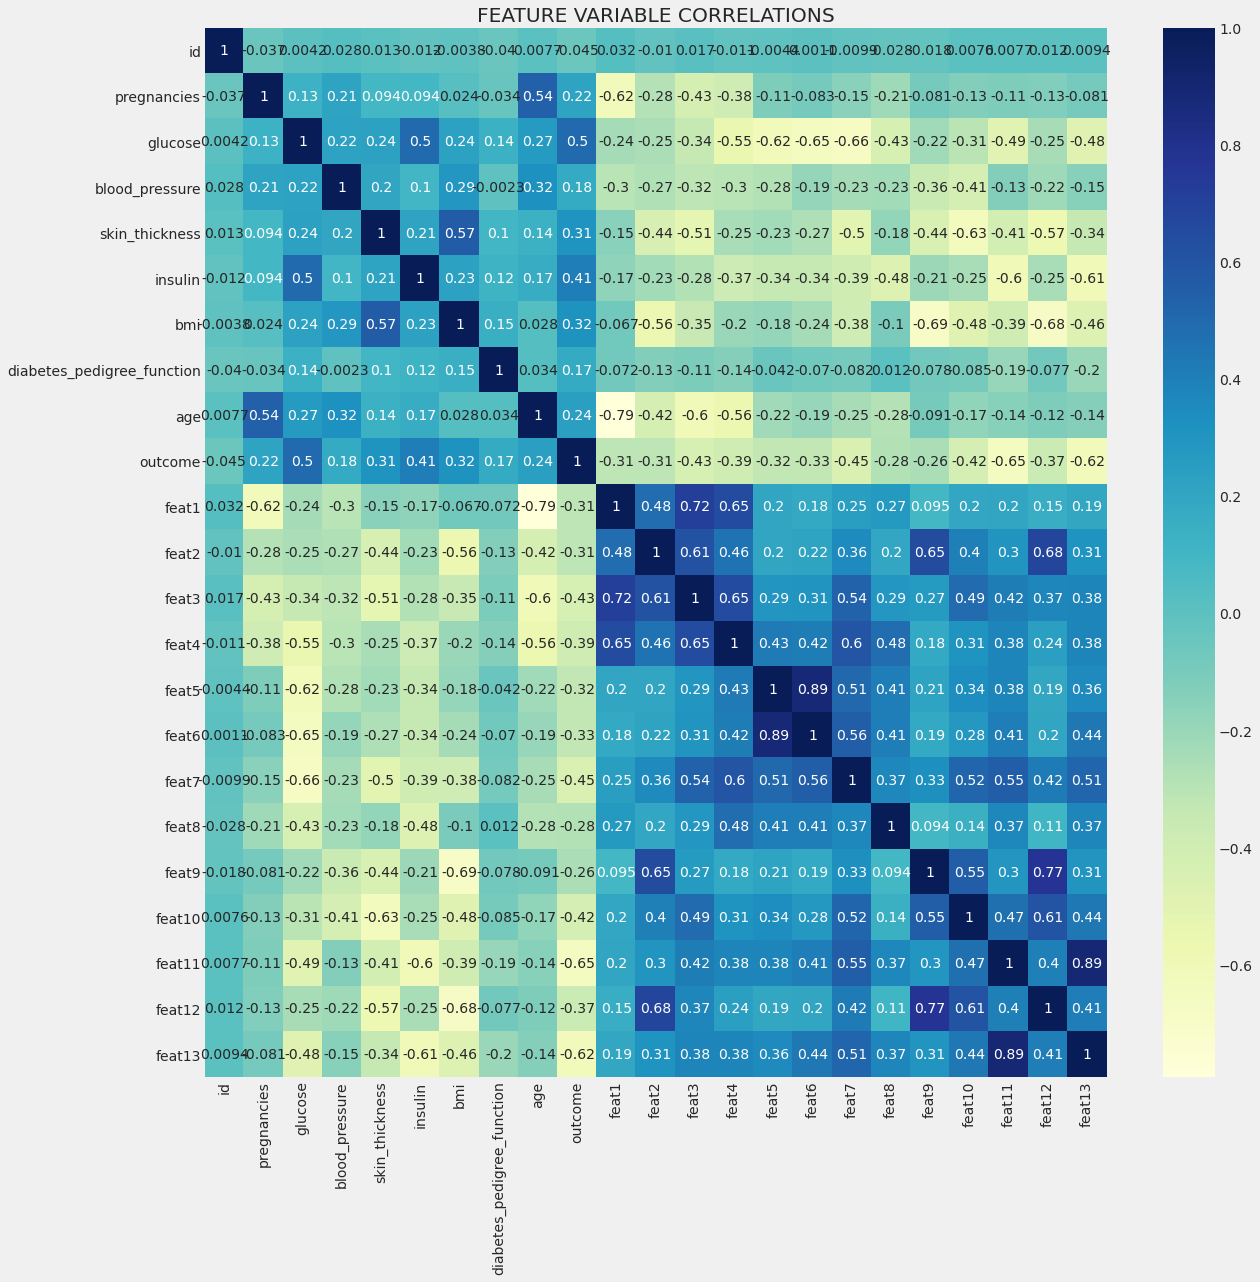

In [94]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar = True,  square = False, annot=True, cmap= 'YlGnBu')
plt.title('FEATURE VARIABLE CORRELATIONS')